In [1]:
  import pandas as pd
import numpy as np
import scipy.stats as sts
import statistics as st
from scipy.stats import norm
from scipy.stats import t
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"AirBnB_outlier_Treated.csv")
df

,ID,Host ID,Host Name,Host Since,Host Response Rate,Host Listings Count,Host Total Listings Count,City,State,Zipcode,...,PETS_FRIENDLY,FAMILY_FRIENDLY,PARKING_AVAILABLE,SECURE_ENTRY,LAUNDRY_AVAILABLE,FIRE_SAFETY_EQUIPPED,ACCESSIBLE,TEMPERATURE_CONTROL,KITCHEN_AVAILABLE,TV_AVAILABLE
0,6165738,31986651,Bernard,2015-04-26 00:00:00,100.00,1.0,1.0,Thoiry,Rhône-Alpes,1710,...,0,1,1,0,1,1,0,1,1,1
1,13908935,82489826,Enice,2016-07-08 00:00:00,100.00,1.0,1.0,Gaillard,Rhône-Alpes,74240,...,0,0,1,1,1,0,0,1,1,1
2,7713011,32492446,Vincent,2015-05-03 00:00:00,100.00,3.5,3.5,Paris,Ile-de-France,75018,...,0,1,0,0,0,1,0,1,1,1
3,3335054,2726446,Pascale,2012-06-24 00:00:00,97.50,1.0,1.0,Paris,Ile-de-France,75018,...,0,0,0,0,0,1,0,1,1,1
4,10066518,30432969,Lea,2015-04-01 00:00:00,95.00,2.0,2.0,Paris,Ile-de-France,75018,...,0,1,0,1,1,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57150,13537098,77859450,Yasemin,15-06-2016,100.00,1.0,1.0,Berlin,Berlin,10245.0,...,0,0,0,0,1,0,0,1,1,0
57151,18064664,14629591,Evelyn,23-04-2014,100.00,1.0,1.0,Berlin,Berlin,10247.0,...,0,0,1,0,1,0,0,1,1,1
57152,13457300,76897030,Ayse,10/6/2016,100.00,2.0,2.0,Berlin,Berlin,10179.0,...,0,1,1,0,1,0,0,1,1,1
57153,7535101,1148921,Tom,12/9/2011,100.00,3.0,3.0,Berlin,Berlin,10115.0,...,1,1,0,1,0,1,0,1,1,1


In [3]:
#
france_listings = df[df['Country'] == 'France']

wifi_france = (france_listings['WIRELESS INTERNET'] == 1).sum()

total_france = len(france_listings)

prob_wifi_in_france = wifi_france / total_france

print(f"Probability that a listing in France has Wi-Fi: {prob_wifi_in_france:.2f}")


Probability that a listing in France has Wi-Fi: 0.94


In [4]:
# Step 1: Filter only Germany listings
germany_listings = df[df['Country'] == 'Germany']

# Step 2: Count how many listings in France have Wi-Fi = "Yes"
wifi_germany = (germany_listings['WIRELESS INTERNET'] == 1).sum()

# Step 3: Total listings in Germany
total_germany = len(germany_listings)

# Step 4: Compute probability
prob_wifi_in_germany = wifi_germany / total_germany

print(f"Probability that a listing in Germany has Wi-Fi: {prob_wifi_in_germany:.2f}")


Probability that a listing in Germany has Wi-Fi: 0.95


In [5]:
# Filter listings in France
france_listings = df[df['Country'] == 'France']

# Step 1: Listings in France with more than 8 beds
beds_gt_3 = france_listings[france_listings['Beds'] > 3]

# Step 2: Of those, how many have a laptop workspace (assuming 'Yes'/'No' values)
family_friendly_count = (beds_gt_3['FAMILY_FRIENDLY'] == 1).sum()

# Step 3: Total listings in France with >8 beds
total_beds_gt_3 = len(beds_gt_3)

# Step 4: Compute conditional probability
if total_beds_gt_3 > 0:
    prob_family_given_beds = family_friendly_count / total_beds_gt_3
    print(f"Probability: {prob_family_given_beds:.2f}")
else:
    print("No listings in France with more than 3 beds.")
print(family_friendly_count)
print(total_beds_gt_3)

Probability: 0.91
2952
3245


In [6]:
# Filter listings in Germany
germany_listings = df[df['Country'] == 'Germany']

# Step 1: Listings in Germany with more than 3 beds
beds_gt_3 = germany_listings[germany_listings['Beds'] > 3]

# Step 2: Of those, how many are Family/Kids Friendly (assuming '1' = Yes)
family_friendly_count = (beds_gt_3['FAMILY_FRIENDLY'] == 1).sum()

# Step 3: Total listings in Germany with >3 beds
total_beds_gt_3 = len(beds_gt_3)

# Step 4: Compute conditional probability
if total_beds_gt_3 > 0:
    prob_family_given_beds = family_friendly_count / total_beds_gt_3
    print(f"Probability: {prob_family_given_beds:.2f}")
else:
    print("No listings in Germany with more than 3 beds.")

print(family_friendly_count)

Probability: 0.85
28


In [7]:
# Step 1: Filter listings in France
france_listings = df[df['Country'] == 'France']

# Step 2: Count listings marked as Family/Kids Friendly = "Yes"
pet_friendly_count = (france_listings['PETS_FRIENDLY'] == 1).sum()

# Step 3: Total listings in France
total_france = len(france_listings)

# Step 4: Compute conditional probability
prob_family_friendly_france = pet_friendly_count / total_france

print(f"Probability that a listing in France is Family/Kids Friendly: {prob_family_friendly_france:.2f}")
print(total_france)
print(pet_friendly_count)

Probability that a listing in France is Family/Kids Friendly: 0.12
56551
6921


In [8]:
# Step 1: Filter listings in Germany
germany_listings = df[df['Country'] == 'Germany']

# Step 2: Count listings marked as Family/Kids Friendly = "Yes"
pet_friendly_count = (germany_listings['PETS_FRIENDLY'] == 1).sum()

# Step 3: Total listings in Germany
total_germany = len(germany_listings)

# Step 4: Compute conditional probability
prob_family_friendly_germany = pet_friendly_count / total_germany

print(f"Probability that a listing in Germany is Family/Kids Friendly: {prob_family_friendly_germany:.2f}")
print(total_germany)
print(pet_friendly_count)

Probability that a listing in Germany is Family/Kids Friendly: 0.17
604
103


In [9]:
# Step 1: Filter only France listings
france_listings = df[df['Country'] == 'France']

# Step 2: Filter listings with >10 reviews AND rating >90
condition = (france_listings['Number of Reviews'] > 10) & (france_listings['Review Scores Rating'] > 90)
matching_listings = france_listings[condition]

# Step 3: Total listings in France
total_france = len(france_listings)

# Step 4: Compute probability
prob = len(matching_listings) / total_france

print(f"Probability: {prob:.2f}")


Probability: 0.22


In [10]:
# Step 1: Filter only Germany listings
germany_listings = df[df['Country'] == 'Germany']

# Step 2: Filter listings with > 10 reviews AND rating >90
condition = (germany_listings['Number of Reviews'] > 10) & (germany_listings['Review Scores Rating'] > 90)
matching_listings = germany_listings[condition]

# Step 3: Total listings in Germany
total_germany = len(germany_listings)

# Step 4: Compute probability
prob = len(matching_listings) / total_germany

print(f"Probability: {prob:.2f}")


Probability: 0.18


In [11]:
# Step 1: Filter France listings
france_listings = df[df['Country'] == 'France']

# Step 2: Filter based on conditions
condition = (france_listings['Host Experience'] > 10) & (france_listings['Host Response Rate'] > 90)
qualified_hosts = france_listings[condition]

# Step 3: Total listings in France
total_france = len(france_listings)

# Step 4: Compute probability
prob = len(qualified_hosts) / total_france

print(f"Probability that a host in France has >10 years experience and response rate >90%: {prob:.2f}")


Probability that a host in France has >10 years experience and response rate >90%: 0.54


In [12]:
# Step 1: Filter Germany listings
germany_listings = df[df['Country'] == 'Germany']

# Step 2: Filter based on conditions
condition = (germany_listings['Host Experience'] > 10) & (germany_listings['Host Response Rate'] > 90)
qualified_hosts = germany_listings[condition]

# Step 3: Total listings in Germany
total_germany = len(germany_listings)

# Step 4: Compute probability
prob = len(qualified_hosts) / total_germany

print(f"Probability that a host in Germany has > 10 years experience and response rate >90%: {prob:.2f}")


Probability that a host in Germany has > 10 years experience and response rate >90%: 0.27


In [13]:
# Step 1: Filter France listings
france_listings = df[df['Country'] == 'France']

# Step 2: Filter listings that are "Entire home/apt"
private_room = france_listings[france_listings['Room Type'] == 'Private room']

# Step 3: Of those, count how many have a laptop workspace (assuming 'Yes'/'No' format)
laptop_workspace_count = (private_room['LAPTOP FRIENDLY WORKSPACE'] == 1).sum()

# Step 4: Total "Entire home/apt" listings in France
total_private_room = len(private_room)

# Step 5: Compute conditional probability
if total_private_room > 0:
    prob = laptop_workspace_count / total_private_room
    print(f"Probability that a listing has a laptop workspace given it's an Private room in France: {prob:.2f}")
else:
    print("No Entire home/apt listings found in France.")


Probability that a listing has a laptop workspace given it's an Private room in France: 0.39


In [14]:
# Step 1: Filter Germany listings
germany_listings = df[df['Country'] == 'Germany']

# Step 2: Filter listings that are "Entire home/apt"
private_room = germany_listings[germany_listings['Room Type'] == 'Private room']

# Step 3: Of those, count how many have a laptop workspace (assuming 'Yes'/'No' format)
laptop_workspace_count = (private_room['LAPTOP FRIENDLY WORKSPACE'] == 1).sum()

# Step 4: Total "Entire home/apt" listings in Germany
total_private_room = len(private_room)

# Step 5: Compute conditional probability
if total_private_room > 0:
    prob = laptop_workspace_count / total_private_room
    print(f"Probability that a listing has a laptop workspace given it's an Private room in Germany: {prob:.2f}")
else:
    print("No Private Room listings found in Germany.")


Probability that a listing has a laptop workspace given it's an Private room in Germany: 0.60


# Sampling

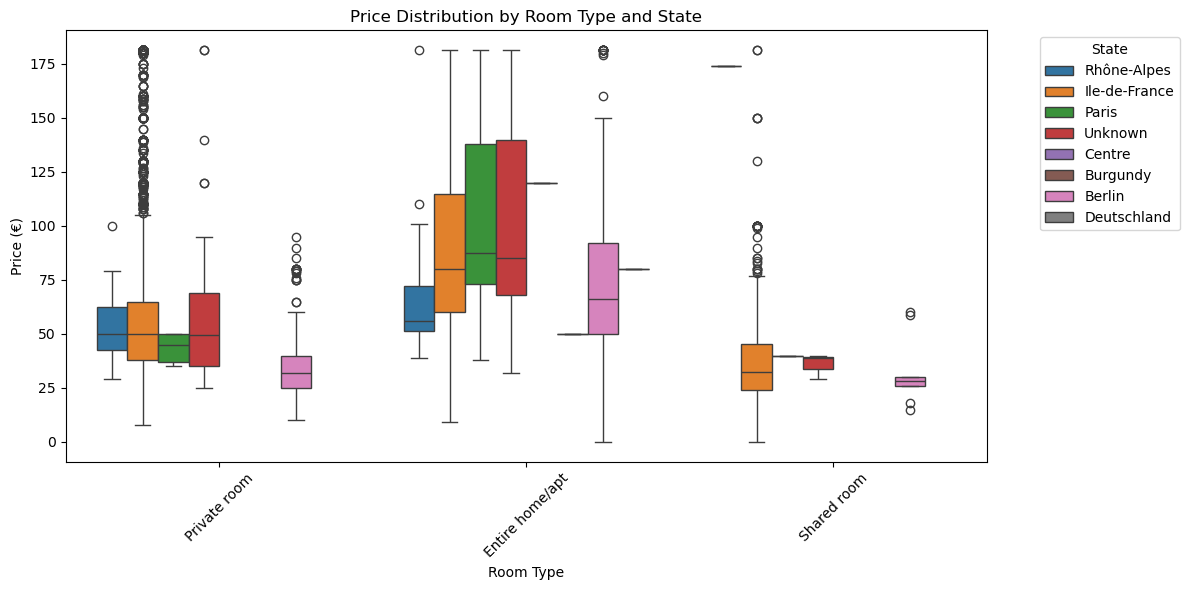

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure price is numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Optional: Filter out outliers or extremely high prices if needed
df_filtered = df[df['Price'] < 1000]  # You can adjust this threshold

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filtered, x='Room Type', y='Price', hue='State')
plt.title('Price Distribution by Room Type and State')
plt.ylabel('Price (€)')
plt.xlabel('Room Type')
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
df.dtypes

ID                        int64
Host ID                   int64
Host Name                object
Host Since               object
Host Response Rate      float64
                         ...   
FIRE_SAFETY_EQUIPPED      int64
ACCESSIBLE                int64
TEMPERATURE_CONTROL       int64
KITCHEN_AVAILABLE         int64
TV_AVAILABLE              int64
Length: 81, dtype: object

In [17]:
df.columns

Index(['ID', 'Host ID', 'Host Name', 'Host Since', 'Host Response Rate',
       'Host Listings Count', 'Host Total Listings Count', 'City', 'State',
       'Zipcode', 'Country', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Amenities', 'Price',
       'Weekly Price', 'Monthly Price', 'Security Deposit', 'Cleaning Fee',
       'Guests Included', 'Extra People', 'Minimum Nights', 'Maximum Nights',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy',
       'Reviews per Month', 'Host Experience', 'Amenities Count',
       'ACCESSIBLE-HEIGHT BED', 'BABYSITTER RECOMMENDATIONS', 'BATHTUB',
       'BED LINENS', 'BREAKFAST', 'BUZZER/WIRELESS INTERCOM', 'CRIB',
       'ELEVATOR IN BUILDING', 'ESSENTIALS', 'EXTRA PILLOWS AND BLANKETS',
       'FIREPLACE GUARDS', 'GYM', 'HAIR DRYER', 'HANGERS', 'HOT TUB',
       'INDOOR FIREPLACE', 'INTERNET', 'IRON', 'LAPTOP FRIENDLY WORKSPACE',
       'LOCK ON BEDROOM DOOR', 'LUGGAGE DRO

In [18]:
# Step 1: Filter France listings
france_listings = df[df['Country'] == 'France'].copy()

# Step 2: Ensure 'Price' is numeric
france_listings['Price'] = pd.to_numeric(france_listings['Price'], errors='coerce')

# Step 3: Group by 'Room Type'
room_groups = france_listings.groupby('Room Type')

# Step 4: Sample 30% from each Room Type group
sampled_data = []
for name, group in room_groups:
    sample = group.sample(frac=0.3, random_state=42)
    sampled_data.append(sample)

# Step 5: Concatenate all samples into one DataFrame
stratified_df = pd.concat(sampled_data, ignore_index=True)

# Step 6: Calculate average price per Room Type
avg_price_by_room = stratified_df.groupby('Room Type')['Price'].mean().round(2)

print(avg_price_by_room)

Room Type
Entire home/apt    91.55
Private room       56.51
Shared room        36.58
Name: Price, dtype: float64


In [19]:
# Step 1: Filter Germany listings
germany_listings = df[df['Country'] == 'Germany'].copy()

# Step 2: Ensure 'Price' is numeric
germany_listings['Price'] = pd.to_numeric(germany_listings['Price'], errors='coerce')

# Step 3: Group by 'Room Type'
room_groups = germany_listings.groupby('Room Type')

# Step 4: Sample 30% from each Room Type group
sampled_data = []
for name, group in room_groups:
    sample = group.sample(frac=0.3, random_state=42)
    sampled_data.append(sample)

# Step 5: Concatenate all samples into one DataFrame
stratified_df_germany = pd.concat(sampled_data, ignore_index=True)

# Step 6: Calculate average price per Room Type
avg_price_by_room_germany = stratified_df_germany.groupby('Room Type')['Price'].mean().round(2)

print(avg_price_by_room_germany)

Room Type
Entire home/apt    70.41
Private room       33.91
Shared room        45.67
Name: Price, dtype: float64


In [20]:
# Step 1: Filter France listings
france_listings = df[df['Country'] == 'France'].copy()

# Step 2: Ensure 'Review Scores Rating' is numeric
france_listings['Review Scores Rating'] = pd.to_numeric(france_listings['Review Scores Rating'], errors='coerce')

# Step 3: Simple random sampling (30% of all France listings)
sample_df = france_listings.sample(frac=0.3, random_state=42)

# Step 4: Group by 'State' and calculate average review score rating
avg_review_by_state = sample_df.groupby('State')['Review Scores Rating'].mean().round(2)

print(avg_review_by_state)

State
Burgundy          79.00
Centre           100.00
Ile-de-France     67.78
Paris             57.73
Rhône-Alpes       56.00
Unknown           75.51
Name: Review Scores Rating, dtype: float64


In [21]:
# Step 1: Filter Germany listings
germany_listings = df[df['Country'] == 'Germany'].copy()

# Step 2: Ensure 'Review Scores Rating' is numeric
germany_listings['Review Scores Rating'] = pd.to_numeric(germany_listings['Review Scores Rating'], errors='coerce')

# Step 3: Simple random sampling (30% of all Germany listings)
sample_df = germany_listings.sample(frac=0.3, random_state=42)

# Step 4: Group by 'State' and calculate average review score rating
avg_review_by_state = sample_df.groupby('State')['Review Scores Rating'].mean().round(2)

print(avg_review_by_state)

State
Berlin    92.67
Name: Review Scores Rating, dtype: float64


for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution {col}')
    plt.show()

In [22]:
numerical_df = df.select_dtypes(include = 'number')
numerical_df.columns

Index(['ID', 'Host ID', 'Host Response Rate', 'Host Listings Count',
       'Host Total Listings Count', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Price', 'Weekly Price', 'Monthly Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Number of Reviews', 'Review Scores Rating',
       'Reviews per Month', 'Host Experience', 'Amenities Count', 'INTERNET',
       'PETS_FRIENDLY', 'FAMILY_FRIENDLY', 'PARKING_AVAILABLE', 'SECURE_ENTRY',
       'LAUNDRY_AVAILABLE', 'FIRE_SAFETY_EQUIPPED', 'ACCESSIBLE',
       'TEMPERATURE_CONTROL', 'KITCHEN_AVAILABLE', 'TV_AVAILABLE'],
      dtype='object')

In [23]:
numerical_df = df.select_dtypes(include = 'number')
numerical_df.columns
numerical_df=  numerical_df.drop(['ID', 'Host ID','INTERNET',
       'PETS_FRIENDLY', 'FAMILY_FRIENDLY', 'PARKING_AVAILABLE', 'SECURE_ENTRY',
       'LAUNDRY_AVAILABLE', 'FIRE_SAFETY_EQUIPPED', 'ACCESSIBLE',
       'TEMPERATURE_CONTROL', 'KITCHEN_AVAILABLE', 'TV_AVAILABLE'],axis=1)

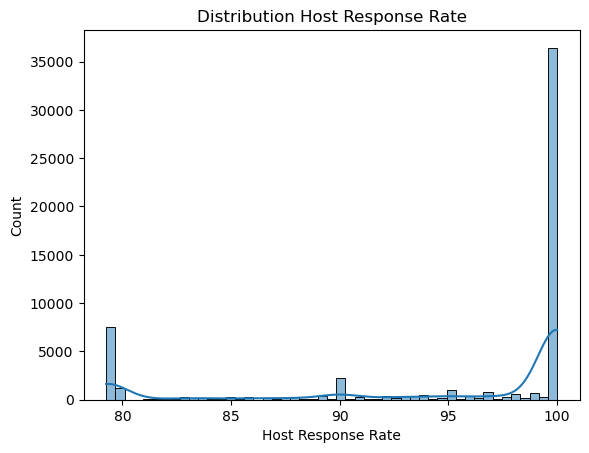

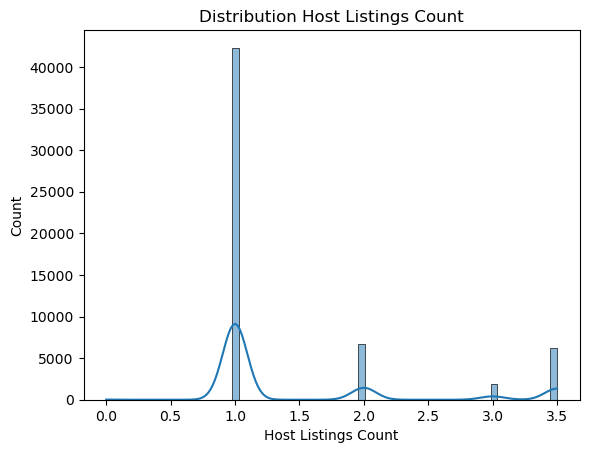

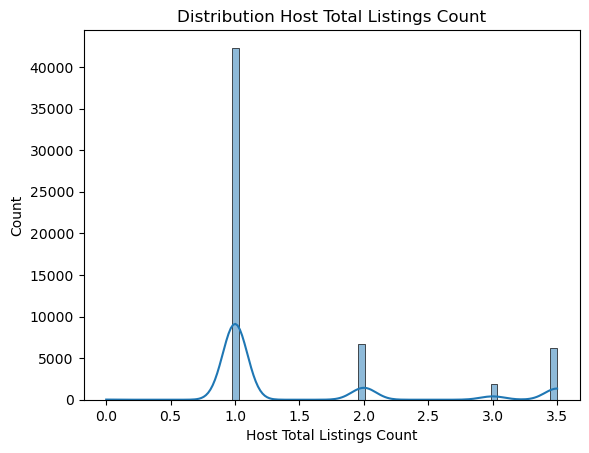

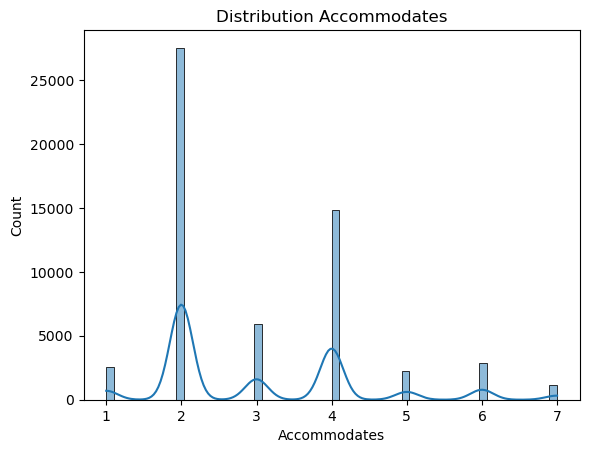

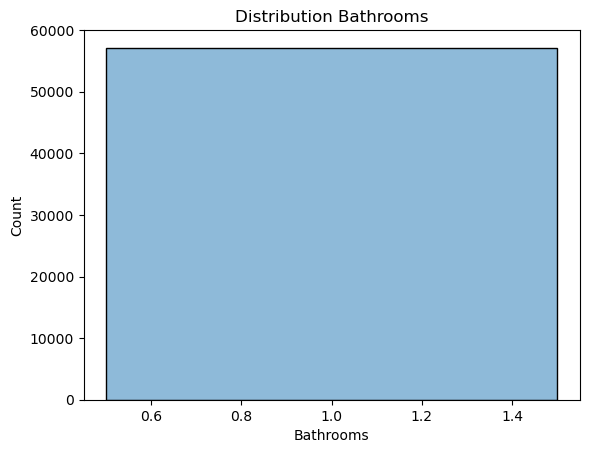

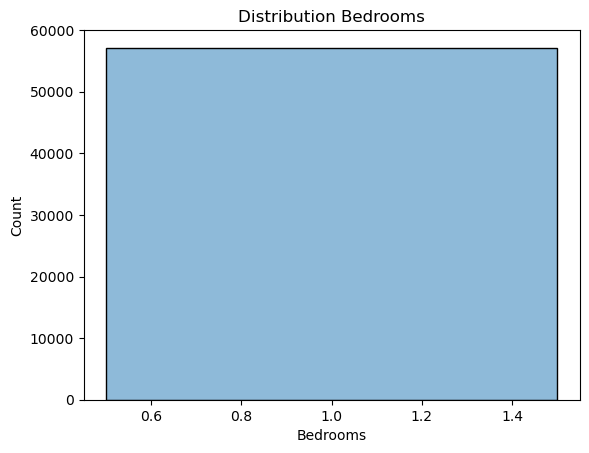

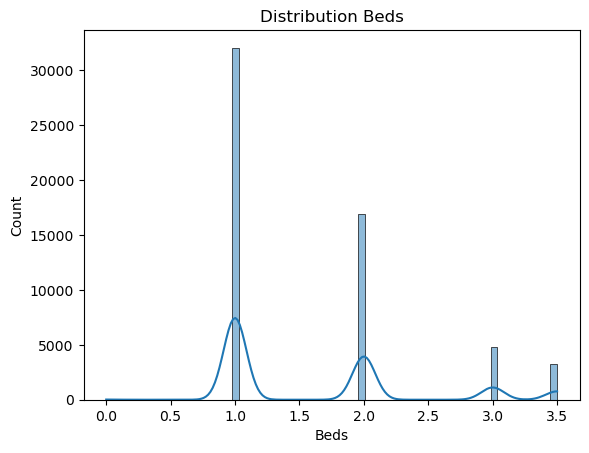

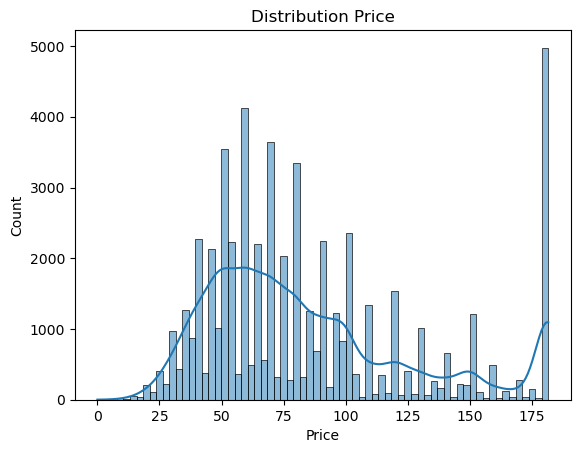

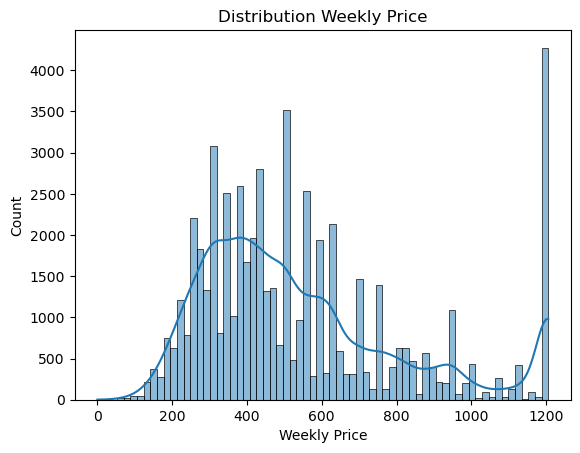

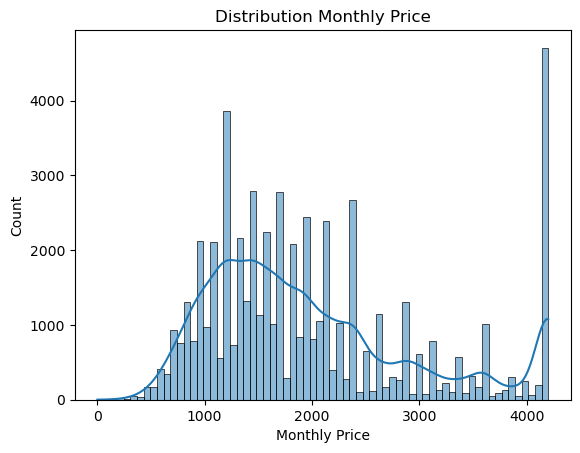

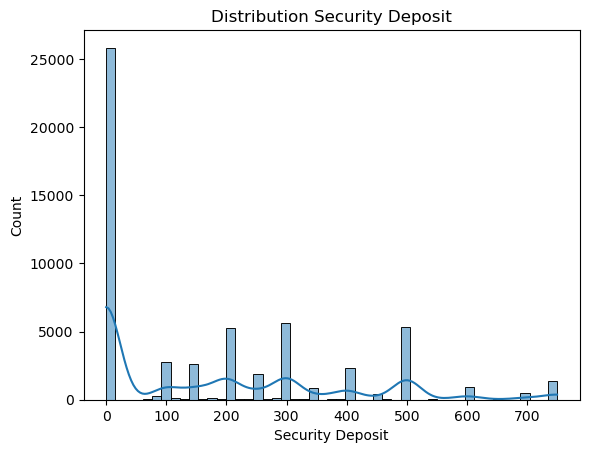

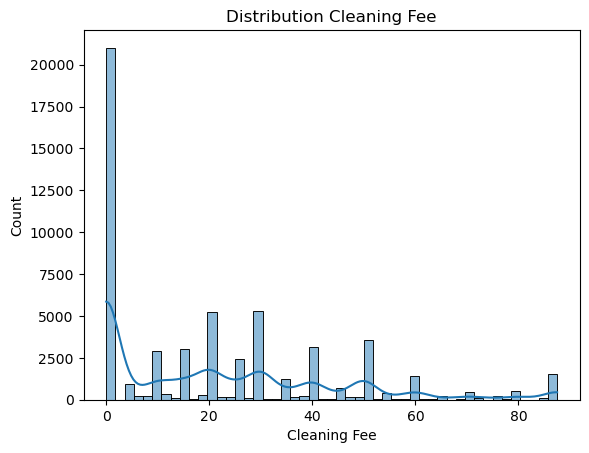

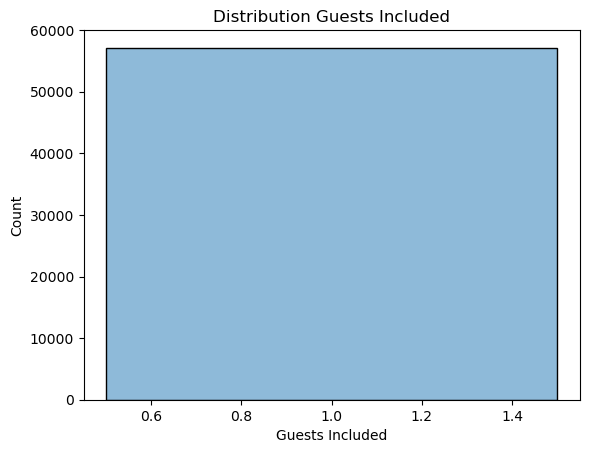

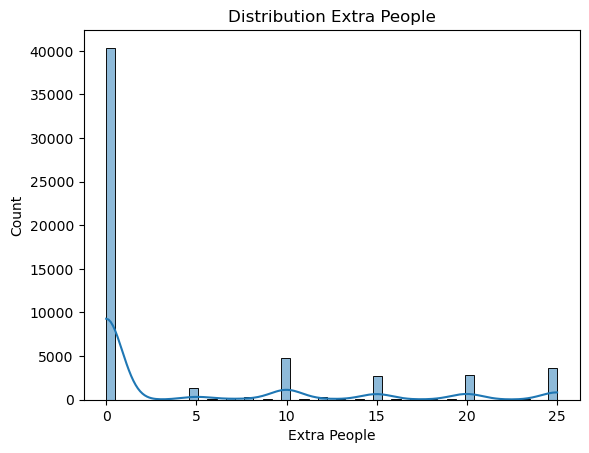

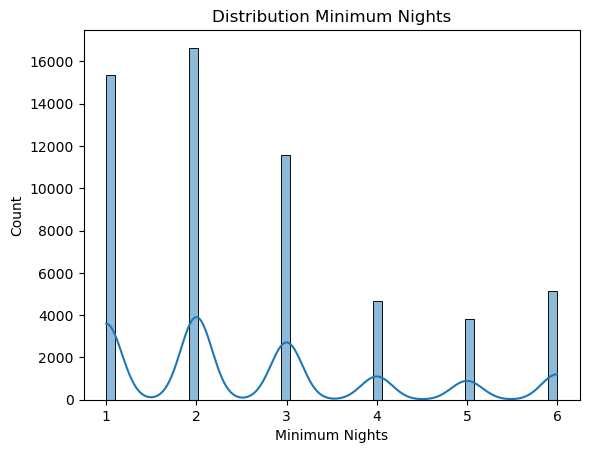

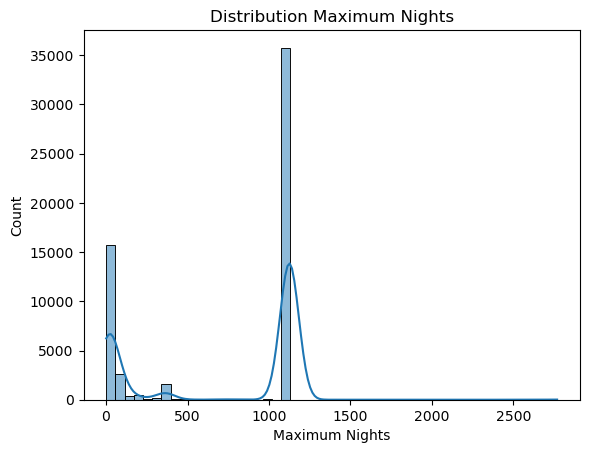

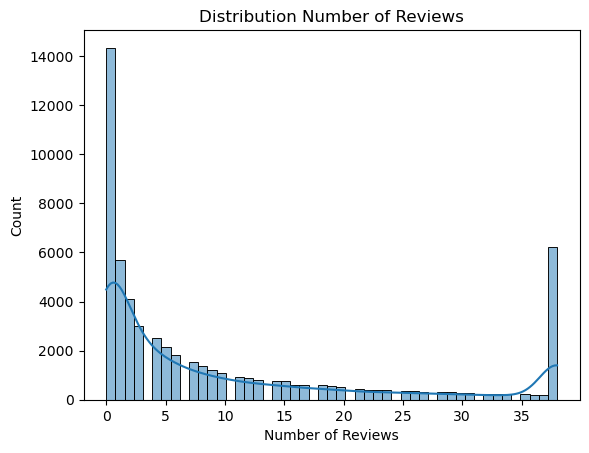

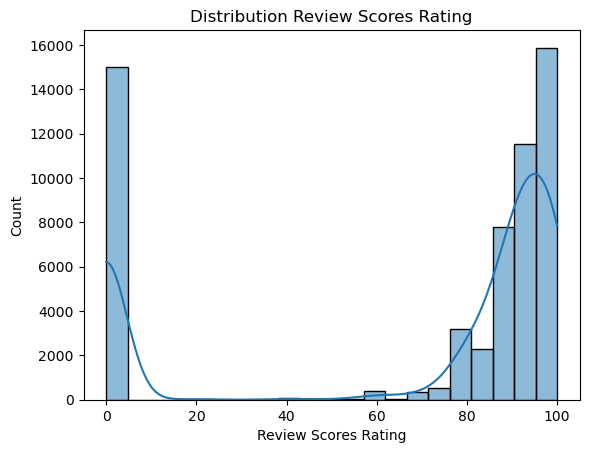

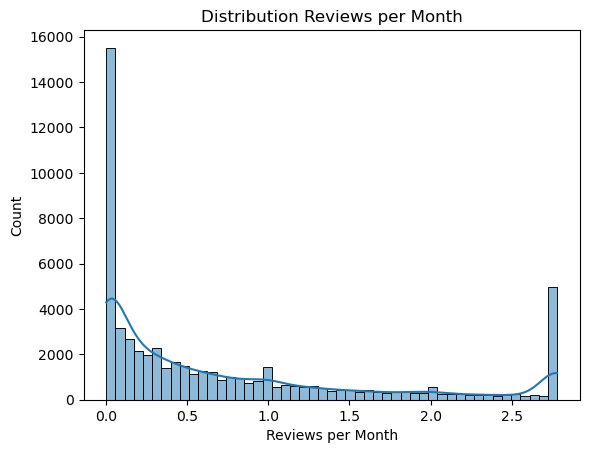

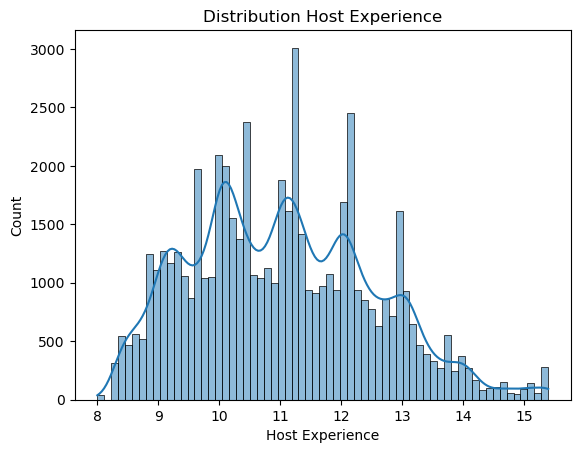

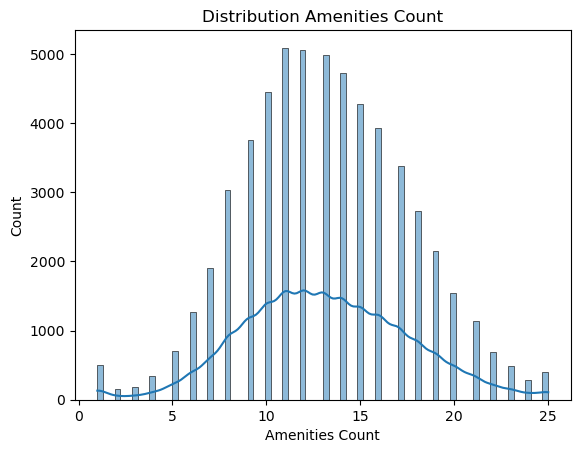

In [24]:
for col in numerical_df.columns:
    sns.histplot(x = col,data = df, kde=True)
    plt.title(f'Distribution {col}')
    plt.show()

In [25]:
france = df[df['Country']=='France']
mu1 = france['Amenities Count'].mean()
mu1

13.125072943007197

In [26]:
germany = df[df['Country']=='Germany']
mu2 = germany['Amenities Count'].mean()
mu2

12.380794701986755

In [27]:
# Step 1: Filter Germany listings
germany_df = df[df['Country'] == 'Germany'].copy()

# Step 2: Drop missing values in 'Amenities Count'
germany_amenities = germany_df['Amenities Count'].dropna()

# Step 3: Take a random sample of 50
sample = germany_amenities.sample(n=50, random_state=1)

# Step 4: Calculate the sample mean
sample_mean = sample.mean()

print(f"Sample mean of Amenities Count (n=50): {sample_mean:.2f}")


Sample mean of Amenities Count (n=50): 11.76


In [28]:
# Step 1: Filter Germany listings
germany_df = df[df['Country'] == 'France'].copy()

# Step 2: Drop missing values in 'Amenities Count'
germany_amenities = germany_df['Amenities Count'].dropna()

# Step 3: Take a random sample of 50
sample = germany_amenities.sample(n=50, random_state=1)

# Step 4: Calculate the sample mean
sample_mean = sample.mean()

print(f"Sample mean of Amenities Count (n=50): {sample_mean:.2f}")


Sample mean of Amenities Count (n=50): 12.78


In [29]:
# H0: mu1 = mu2
# H1: mu != mu


# Filter full data
france = df[df['Country'] == 'France']
germany = df[df['Country'] == 'Germany']


# Sample 20% from each
sample_france = france.sample(frac=0.2, random_state=42)
sample_germany = germany.sample(frac=0.2, random_state=42)

# Population means
mu1 = st.mean(france['Amenities Count'])
mu2 = st.mean(germany['Amenities Count'])

# Sample means

x1 = st.mean(sample_france['Amenities Count'])
x2 = st.mean(sample_germany['Amenities Count'])


# Sample sizes
n1 = len(sample_france)
n2 = len(sample_germany)

# Population standard deviations (or large-sample approx)
sigma1 = st.stdev(france['Amenities Count'])
sigma2 = st.stdev(germany['Amenities Count'])

# Z-critical value for two-tailed test at alpha = 0.05
alpha = 0.05
z_crit = norm.ppf(1 - alpha/2)

# Z-statistic
z_stats = ((x1 - x2) - (mu1 - mu2)) / ((sigma1**2 / n1 + sigma2**2 / n2) ** 0.5)

# p-value
p_value = norm.sf(abs(z_stats)) * 2

# Output
print(f"France mean: {mu1:.2f}, Germany mean : {mu2:.2f}")
print(f"Sample mean France : {x1:.2f}, Sample mean Germany : {x2:.2f}")
print(f"Z-critical: {z_crit:.2f}")
print(f"Z-statistic: {z_stats:.2f}")
print(f"P-value: {p_value:.4f}")

# Decision
if abs(z_stats) > z_crit:
    print("✅ Reject NUll Hypothesis : Significant difference in amenities count.")
else:
    print("Accept NUll Hypothesis : No significant difference.")


France mean: 13.13, Germany mean : 12.38
Sample mean France : 13.18, Sample mean Germany : 12.22
Z-critical: 1.96
Z-statistic: 0.54
P-value: 0.5914
Accept NUll Hypothesis : No significant difference.
